In [7]:
import hkvwaporpy as hkv

#### METADATA REQUEST FOR AVAILABLE PRODUCTS

In [8]:
# request the catalogus
df = hkv.read_wapor.get_catalogus()
df.head()

,additionalInfo,caption,code,dataType,description,index,links,operation,workspaceCode
0,"{'temporalExtent': 'from 2010 to date', 'tempo...",Gross Biomass Water Productivity,L1_GBWP,RASTER,The annual Gross Biomass Water Productivity ex...,1,"[{'rel': 'self', 'href': 'https://api.fao.org/...","{'AreaStats': True, 'PixelTimeSeries': True}",WAPOR
1,"{'temporalExtent': 'from 2010 to date', 'tempo...",Net Biomass Water Productivity,L1_NBWP,RASTER,The annual Net Biomass Water Productivity expr...,2,"[{'rel': 'self', 'href': 'https://api.fao.org/...","{'AreaStats': True, 'PixelTimeSeries': True}",WAPOR
2,"{'temporalResolution': 'from 2010 to date', 's...",Actual EvapoTranspiration (Annual),L1_AET_A,RASTER,The EvapoTranspiration (ET) is the sum of the ...,3,"[{'rel': 'self', 'href': 'https://api.fao.org/...","{'AreaStats': True, 'PixelTimeSeries': True}",WAPOR
3,"{'temporalResolution': 'annual', 'spatialResol...",Above Ground Biomass Production (Annual),L1_AGBP_A,RASTER,The annual Above Ground Biomass Production exp...,5,"[{'rel': 'self', 'href': 'https://api.fao.org/...","{'AreaStats': True, 'PixelTimeSeries': True}",WAPOR
4,"{'temporalExtent': 'from 2010 to date', 'tempo...",Transpiration (Annual),L1_T_A,RASTER,The annual Transpiration is the portion of ann...,6,"[{'rel': 'self', 'href': 'https://api.fao.org/...","{'AreaStats': True, 'PixelTimeSeries': True}",WAPOR


In [9]:
# show all codes
df[['caption','code']]

,caption,code
0,Gross Biomass Water Productivity,L1_GBWP
1,Net Biomass Water Productivity,L1_NBWP
2,Actual EvapoTranspiration (Annual),L1_AET_A
3,Above Ground Biomass Production (Annual),L1_AGBP_A
4,Transpiration (Annual),L1_T_A
5,Actual EvapoTranspiration (Dekadal),L1_AET_D
6,Transpiration Fraction,L1_TFRAC
7,Reference EvapoTranspiration,L1_RET
8,Net Primary Production,L1_NPP
9,Precipitation,L1_PCP


In [10]:
ds_code='L2_AET_D'

In [1]:
# get additional info of the dataset given a code and catalogus
df_add = hkv.read_wapor.get_additional_info(df, cube_code=ds_code)
df_add

NameError: name 'hkv' is not defined

In [12]:
# select single row of catalogus given a code
df_row = df.loc[df['code'] == ds_code]
df_row.T

,10
additionalInfo,"{'temporalExtent': 'from April 2009 to date', ..."
caption,Actual EvapoTranspiration (Dekadal)
code,L2_AET_D
dataType,RASTER
description,The Evapotranspiration (ET) is the sum of the ...
index,25
links,"[{'rel': 'self', 'href': 'https://api.fao.org/..."
operation,"{'AreaStats': False, 'PixelTimeSeries': True}"
workspaceCode,WAPOR


In [13]:
# get data availablitiy and corresponding raster id's given date range
df_avail = hkv.read_wapor.get_data_availability(df_row, dimensions_range='[2001-11-01,2017-11-01]')
df_avail.head()

,start_dekad,end_dekad,raster_id
year,,,
2009,0101,0110,L2_AET_0901
2009,0111,0120,L2_AET_0902
2009,0121,0131,L2_AET_0903
2009,0201,0210,L2_AET_0904
2009,0211,0220,L2_AET_0905


In [14]:
df_locations = hkv.read_wapor.get_locations(filter_value=None)
df_locations.head()

,name,code,type,bbox
0,Awash,7010,BASIN,"[37.9583333333327, 7.89583333333234, 43.320833..."
1,Jordan,6006,BASIN,"[34.4249999999993, 29.4624999999998, 36.799999..."
2,Litani,6002,BASIN,"[35.2291666666659, 33.0999999999998, 36.399999..."
3,Niger,7002,BASIN,"[-11.5874999999999, 4.27083333333253, 15.85833..."
4,Nile,7003,BASIN,"[23.4458333333329, -4.0291666666674, 39.808333..."


In [15]:
location = 'Awash'

In [16]:
year = df_avail.iloc[0].name
raster_id = df_avail.iloc[0]['raster_id']
location_code = df_locations.loc[df_locations['name'] == location]['code'][0]
print(raster_id)

L2_AET_0901


In [51]:
location_code

'7010'

In [38]:
url = hkv.read_wapor.get_coverage_url(ds_code, year, raster_id, location_code)
print(url)

http://www.fao.org/wapor-download/WAPOR/coverages/mosaic/CLIPPED/L2_AET_D/2009/0901/L2_AET_0901_7010.tif


In [39]:
import datetime

In [43]:
# get data availablitiy and corresponding raster id's given date range
df_avail = hkv.read_wapor.get_data_availability(df_row, dimensions_range='[2016-01-01,2017-11-01]')
df_avail.head()

,start_dekad,end_dekad,raster_id
year,,,
2016,0101,0110,L2_AET_1601
2016,0111,0120,L2_AET_1602
2016,0121,0131,L2_AET_1603
2016,0201,0210,L2_AET_1604
2016,0211,0220,L2_AET_1605


In [50]:
row['raster_id']

'L2_AET_1636'

In [55]:
cube_code = 'L2_AET_D'
for idx, row in df_avail.iterrows():    
    #print(row)
    year = row.name
    cov_url = hkv.read_wapor.get_coverage_url(
        cube_code = cube_code,
        year = row.name, 
        raster_id = row['raster_id'], 
        location_code='7010')
    print(cov_url)

http://www.fao.org/wapor-download/WAPOR/coverages/mosaic/CLIPPED/L2_AET_D/2016/1601/L2_AET_1601_7010.tif
http://www.fao.org/wapor-download/WAPOR/coverages/mosaic/CLIPPED/L2_AET_D/2016/1602/L2_AET_1602_7010.tif
http://www.fao.org/wapor-download/WAPOR/coverages/mosaic/CLIPPED/L2_AET_D/2016/1603/L2_AET_1603_7010.tif
http://www.fao.org/wapor-download/WAPOR/coverages/mosaic/CLIPPED/L2_AET_D/2016/1604/L2_AET_1604_7010.tif
http://www.fao.org/wapor-download/WAPOR/coverages/mosaic/CLIPPED/L2_AET_D/2016/1605/L2_AET_1605_7010.tif
http://www.fao.org/wapor-download/WAPOR/coverages/mosaic/CLIPPED/L2_AET_D/2016/1606/L2_AET_1606_7010.tif
http://www.fao.org/wapor-download/WAPOR/coverages/mosaic/CLIPPED/L2_AET_D/2016/1607/L2_AET_1607_7010.tif
http://www.fao.org/wapor-download/WAPOR/coverages/mosaic/CLIPPED/L2_AET_D/2016/1608/L2_AET_1608_7010.tif
http://www.fao.org/wapor-download/WAPOR/coverages/mosaic/CLIPPED/L2_AET_D/2016/1609/L2_AET_1609_7010.tif
http://www.fao.org/wapor-download/WAPOR/coverages/mosai

#### COVERAGE REQUEST FOR SINGLE PRODUCT

In [30]:
import requests
from io import BytesIO
import uuid
from osgeo import gdal

In [31]:
resp = requests.get(url)

In [32]:
image_data = BytesIO(resp.content)

In [33]:
filename = uuid.uuid4().hex
mmap_name = "/vsimem/{}".format(filename)
gdal.FileFromMemBuffer(mmap_name, image_data.read())
dataset = gdal.Open(mmap_name)

In [34]:
print(gdal.Info(mmap_name))

Driver: GTiff/GeoTIFF
Files: /vsimem/473a357685894899a0f15de1f91b86f3
Size is 5406, 4529
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (37.957809690116008,12.388405738995999)
Pixel Size = (0.000992063000000,-0.000992063000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  37.9578097,  12.3884057) ( 37d57'28.11"E, 12d23'18.26"N)
Lower Left  (  37.9578097,   7.8953524) ( 37d57'28.11"E,  7d53'43.27"N)
Upper Right (  43.3209023,  12.3884057) ( 43d19'15.25"E, 12d23'18.26"N)
Lower Right (  43.3209023,   7.8953524) ( 43d19'15.25"E,  7d53'43.27"N)
Center      (  40.6393560,  10.1418791) ( 40d38'21.68"E, 10d 8'30.76"N)
Band 1 Block=256x256 Type=Byte, ColorInterp=Gray
  NoData

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline

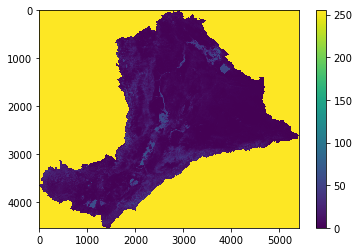

In [36]:
im = plt.imshow(dataset.ReadAsArray())
plt.colorbar(im)

#### TIMESERIES REQUEST FOR SINGLE PRODUCT

In [ ]:
# query_json = {  
#    "type":"PixelTimeSeries",
#    "params":{  
#       "cube":{  
#          "code":"L2_AGBP_S",
#          "workspaceCode":"WAPOR",
#          "language":"en"
#       },
#       "dimensions":[  
#          {  
#             "code":"SEASON",
#             "values":[  
#                "S1"
#             ]
#          },
#          {  
#             "code":"YEAR",
#             "range":"[2014-09-01,2016-01-01]"
#          }
#       ],
#       "measures":[  
#          "AGBP_S"
#       ],
#       "point":{  
#          "crs":"EPSG:4326",
#          "x":39.40862388968785,
#          "y":10.60703111476445
#       }
#    }
# }